In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from tqdm.notebook import trange, tqdm

import cv2
import numpy as np
from functools import partial

from tqdm.notebook import tqdm

from pathlib import Path
colour = Path('../GTA_images/Simple/Colour')
depth = Path('../GTA_images/Simple/Depth')

import sys
sys.path.append('../')

from depth_Functions import (
    import_raw_colour_image, 
    import_raw_depth_image, 
    show_img,
    show_array_of_images,
    show_function,
    stand
)

from Feature_Extraction import (
    create_local_feature_vector
)

from Feature_array import Feature_array

from Laplacian_copy import Laplacian, calculate_relative

In [40]:
colour_images = [import_raw_colour_image(str(file)) for file in sorted(colour.iterdir())]
depth_images = [import_raw_depth_image(str(file)) for file in sorted(depth.iterdir())]

In [41]:
train_images = colour_images[:-1]
train_labels = depth_images[:-1]
test_images = colour_images[-1]
test_labels = depth_images[-1]

In [47]:
test = Laplacian(np.full((360,1,17),1e-3), np.full((360,1,17,17),1e-8), partial(create_local_feature_vector, squares=False))

In [48]:
test.weights.shape
# test.var_weights.shape
# test.relative_weights.shape
# test.relative_var_weights.shape

(360, 1, 17)

In [49]:
test.train(train_images, train_labels)

In [50]:
test.weights.shape
# test.var_weights.shape
# test.relative_weights.shape
# test.relative_var_weights.shape

(360, 1, 17)

In [51]:
test_local = test.predict(test_images, relative=False)
# test_relative = test.predict(test_images, local=False)
# test_complete = test.predict(test_images)

In [52]:
test_local.shape
# test_relative[0].shape
# test_complete.shape

(720, 1280)

In [56]:
test.weights

array([[[ 1.75086214e-06,  1.69470253e-05, -1.44612503e-05, ...,
          5.79005054e-06, -5.03342002e-06, -7.74940109e-06]],

       [[ 9.74834360e-06,  7.96002205e-06, -1.46388649e-05, ...,
          9.48132995e-06, -7.93860566e-06, -5.31798522e-06]],

       [[ 5.99036646e-06,  8.50213364e-06, -8.66524741e-06, ...,
          8.83784290e-06, -1.00165924e-05, -3.26893665e-06]],

       ...,

       [[ 6.10961657e-04,  1.53329096e-03, -3.09416950e-03, ...,
          1.43222616e-03, -3.87909787e-04, -6.01155931e-04]],

       [[ 8.12674392e-04,  1.31472878e-03, -2.50855451e-03, ...,
          4.97297657e-04, -1.52150089e-03, -1.02301706e-03]],

       [[ 2.92934761e-04,  1.24602210e-03, -8.80338775e-04, ...,
          1.15868278e-03, -8.08440870e-04, -7.78003357e-04]]])

In [54]:
test_local

array([[1.        , 1.        , 1.        , ..., 0.99916101, 0.99941151,
        0.99972888],
       [1.        , 1.        , 1.        , ..., 0.9989234 , 0.99912315,
        0.99952883],
       [1.        , 1.        , 1.        , ..., 0.99929568, 0.99956574,
        0.99779498],
       ...,
       [0.95572885, 0.97298823, 0.96851018, ..., 0.97992791, 0.98964301,
        0.99196921],
       [0.90298179, 0.97740957, 0.94947357, ..., 0.90523267, 0.96030758,
        0.97985719],
       [0.98300357, 0.95703644, 0.9935758 , ..., 0.99539559, 0.94623741,
        0.98470341]])

In [55]:
test_labels

array([[1.        , 1.        , 1.        , ..., 0.99072814, 0.9907227 ,
        0.99108315],
       [1.        , 1.        , 1.        , ..., 0.99617153, 0.99618804,
        0.9910846 ],
       [1.        , 1.        , 1.        , ..., 0.9961738 , 0.9961894 ,
        0.99108595],
       ...,
       [0.9563754 , 0.9563748 , 0.9563743 , ..., 0.8732538 , 0.87327915,
        0.87330645],
       [0.956274  , 0.9562734 , 0.9562728 , ..., 0.87268597, 0.8727113 ,
        0.8727367 ],
       [0.95617247, 0.95617193, 0.95617133, ..., 0.8721181 , 0.87214345,
        0.87216884]], dtype=float32)

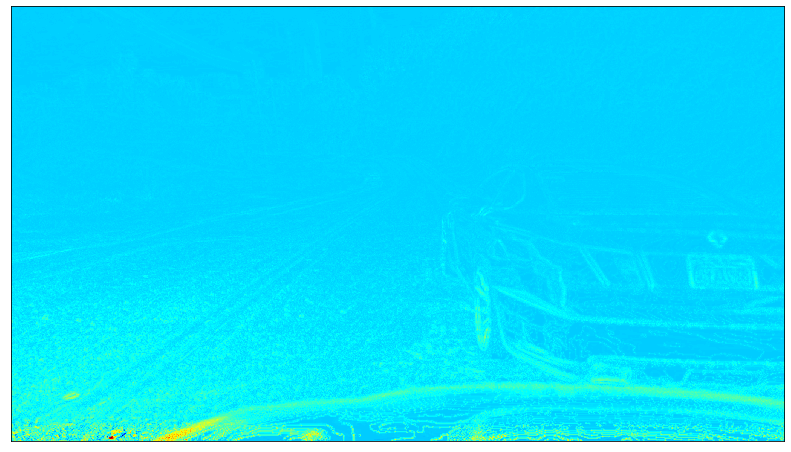

In [53]:
show_img(test_local, depthmap=True)
# show_img(test_complete, depthmap=True)
# show_img(test_labels, depthmap=True)

In [58]:
np.sum(np.sqrt((test_local - test_labels)**2))

16670.822087572764

In [ ]:
np.sum(test_local - test_labels)

In [233]:
np.diff(test_labels, axis=1).shape

(720, 1279)

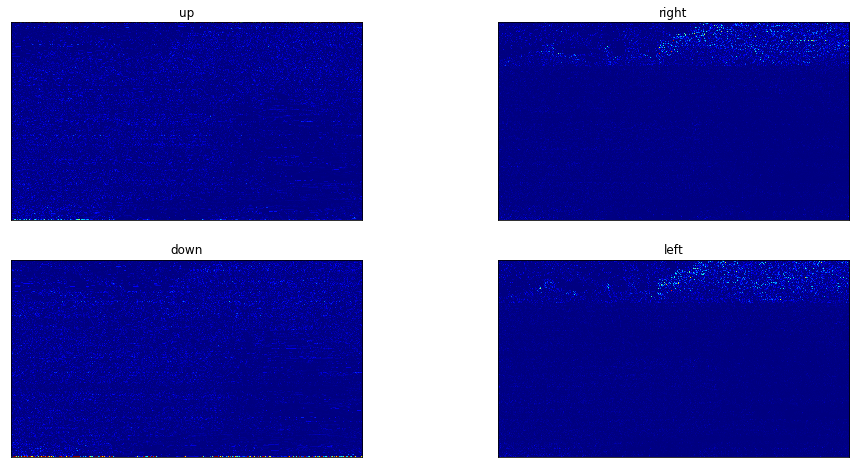

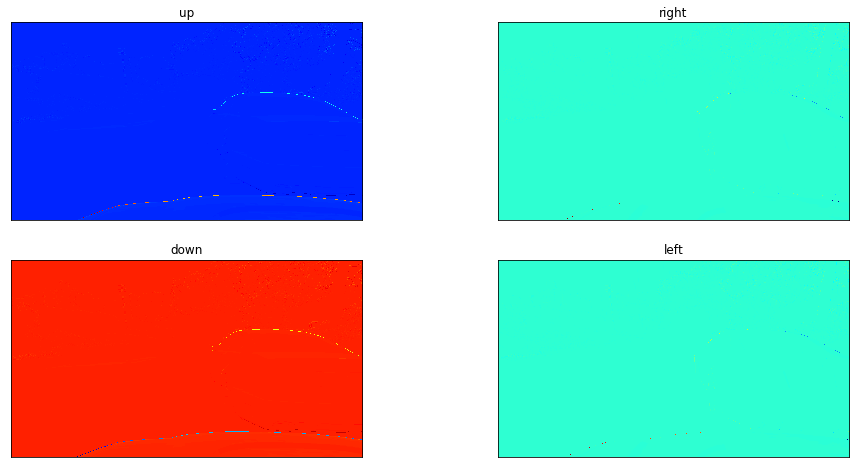

In [248]:
direction = ['up', 'right', 'down', 'left']
show_array_of_images(test_relative, depthmap=True, titles=direction)
show_array_of_images(list(calculate_relative(test_labels)), depthmap=True, titles=direction)

In [275]:
test_linear_exp = Laplacian(np.full((360,1,34),1e-3), np.full((360,1,17),1e-5), get_feature_vector)

In [276]:
test_linear_exp.weights.shape

(360, 1, 34)

In [286]:
test_linear_exp.train_exp_linear(train_images, train_labels)

/storage/depth_estimation/Markov_Random_Field/Laplacian.py:116: RuntimeWarning: invalid value encountered in log
  return output


ValueError: Residuals are not finite in the initial point.

In [269]:
linear_exp_prediction = test_linear_exp.predict_linear_and_exp(test_images)

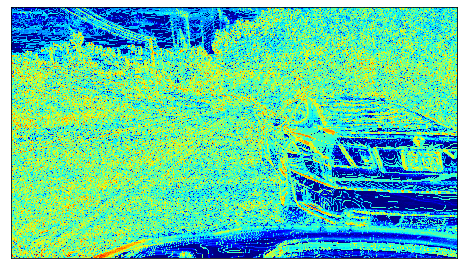

In [271]:
show_img(linear_exp_prediction, depthmap=True)